In [1]:
import pandas as pd
import numpy as np

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Credit Amount EDA Case Study

Introduction:
We have loan applications data for about 307k applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the bank to identify the characteristics for bad loan applications. ( Bad loans are loans which are delayed/not paid.)

Objectives:
* Identify what are some common characteristics of bad loan applications
* Identify if there are any patterns related to applicants with loan difficulties
* Identify the driving factors or strong indicators of a bad loan application

Data Dictionary:
A common starting point in any EDA problem is - Understanding the data.

The first step is to check if there is a data dictionary availalble, and try to get a good understanding of the level of the data and meaning of each of the columns.

The data dictionary document has been provided along with the data. It is advised to go through each of the column in data once before starting with EDA.

In [2]:
col_desc = pd.read_csv("D:/Jupyter/columns_description.csv")
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


# EDA - Credit Applications

Let's begin our EDA now. The flow of the entire case would be as follows - 

1. Data Wrangling
2. Univariate Analysis
3. Bivariate/Multivariate Analysis
4. Final Insights

In [3]:
# For suppressing warning messages
import warnings

warnings.filterwarnings('ignore')

In [4]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline   


# 1. Data Wrangling

Loading the data -

In [6]:
credit_data = pd.read_csv("D:/Jupyter/application_data.csv")
credit_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We see that the data is at Loan ID level ( SK_ID_CURR). There is a mix of quantitative and qualitative variables. There are a lot of Flags as well. There are considerable NAs as well at the first glance of data.

### 1.1 Inspecting data

In [215]:
# Checking shape of the data

credit_data.shape

(307511, 122)

Now we know that there are 307511 loan applications and 122 fields for each application. 

In [8]:
# Checking 5 point summary with describe function

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### Invalid -ve values

Another important use case of describe function is to check for Invalid -ve values.
Here for example, a close look will tell us that all the columns starting with "DAYS_..." (example - DAYS_BIRTH ) have -ve values which cannot be valid.
We will clean the data by tranforming this data appropriately later. 


In [9]:
# Null % for all columns in data

null_perc = credit_data.isnull().sum()/len(credit_data)*100
null_perc

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [10]:
# Null % for all columns in data in descending order
null_perc.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Columns with a lot of NULLs are not useful for us as they would only capture data about a select applications.

There is no standard rule for a good/bad % NULLs for columns to be used or discarded. It should be purely dependent on use case and application of the EDA.

In our case, in order to keep this exercise simpler, we will discard all columns having more than 45% NULLs.

### 1.2 Data Cleaning 

Identifying and removing columns with more than 45% nulls

In [11]:
null_col = credit_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values > (0.45 *len(credit_data))]
null_col

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [12]:
null_col.count()

49

There are 49 columns with more than 45% NULLs
Let's visually look at the columns with NULLs>45% and there NULL counts -

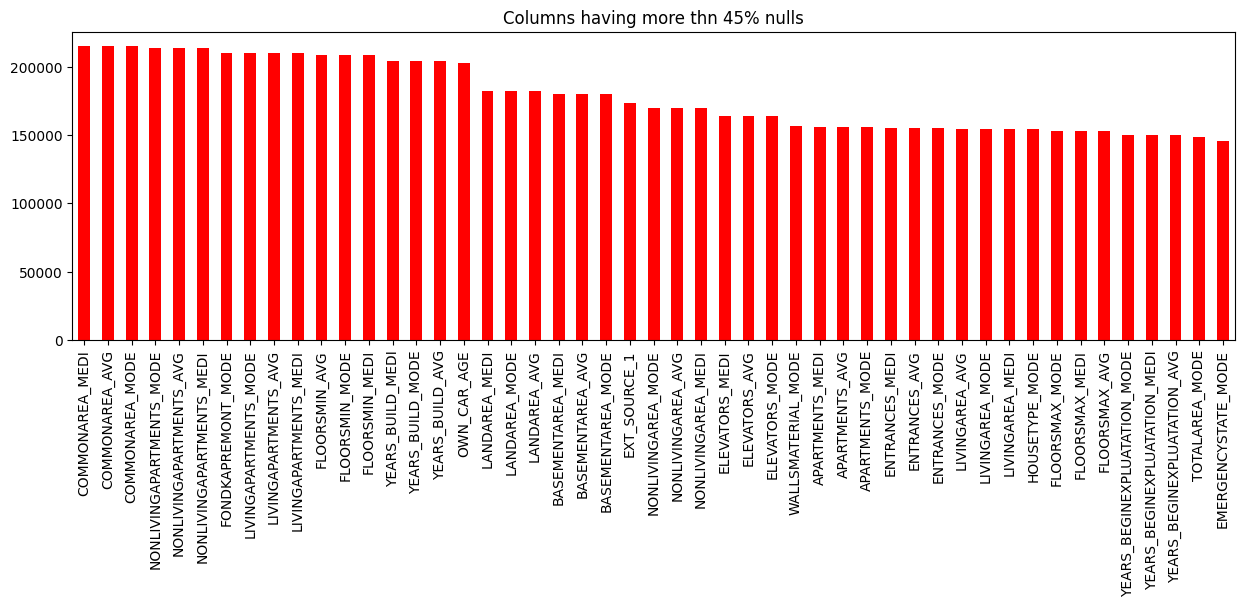

In [13]:
plt.figure(figsize=(15,4))
null_col.plot(kind ='bar',color = 'red')
plt.title('Columns having more thn 45% nulls')
plt.show()

##### Removal of columns with NULLs>45%

In [14]:
# Function to remove the columns having percentage of null values > 45%
perc = 0.45
credit_data1=credit_data.copy()
rem_cols = credit_data1.isnull().sum()/len(df)
rem_cols = rem_cols[rem_cols.values >= perc].index
credit_data1.drop(labels = rem_cols,axis = 1,inplace = True)


NameError: name 'df' is not defined

In [ ]:
credit_data1.shape

In [ ]:
credit_data1

In [15]:
(credit_data1.isnull().sum()/len(credit_data1)*100).sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

We have now verified that our modified dataframe "Credit_data1" has no cols with more than 31% NULLs

### 1.3 Imputing Missing Data

The below listed columns can be categorized into a group of columns with similar significance as they all represent number of queries made to the Credit Bureau. 

Upon further investigation, we'll see that all have mode as 0. 
We can impute NULLs for all of these with value 0. 

In the end it is also varified that there are 0 NULLs after imputation.

##### AMT_REQ_CREDIT_BUREAU_YEAR
##### AMT_REQ_CREDIT_BUREAU_MON
##### AMT_REQ_CREDIT_BUREAU_WEEK
##### AMT_REQ_CREDIT_BUREAU_DAY
##### AMT_REQ_CREDIT_BUREAU_HOUR
##### AMT_REQ_CREDIT_BUREAU_QRT

In [16]:
# Checking value counts for AMT_REQ_CREDIT_BUREAU_YEAR
credit_data1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [17]:
print(credit_data1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())
print(credit_data1['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(credit_data1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
print(credit_data1['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print(credit_data1['AMT_REQ_CREDIT_BUREAU_QRT'].mode())
print(credit_data1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())




0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [18]:
credit_data2 = credit_data1.copy() # Making copy of our last data

##### Imputing NULLs with 0s

In [19]:
impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK']
impute_list

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [20]:
for i in impute_list:
    credit_data2[i] = credit_data1[i].fillna(0)

##### Verifying count of NULLs after imputaion

In [21]:
# Verifying count of NULLs after imputaion

print(credit_data2['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print(credit_data2['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print(credit_data2['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print(credit_data2['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print(credit_data2['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print(credit_data2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

0
0
0
0
0
0


#### AMT_ANNUITY

Since AMT_ANNUITY is a continuous variable, unlike AMT_REQ_CREDIT_BUREAU_YEAR etc ( which could take only integer values), it is better to impute this with the median value.

Another reason for chosing to go for Median instead of Mode is close value counts for top 2 values as we'll see below.

In [22]:
credit_data2['AMT_ANNUITY'].isnull().sum()

12

In [23]:
# Checking value counts for AMT_ANNUITY
credit_data2['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

We see that top 2 value counts are close to each other. Thus we can chose to go for Median imputation.

In [24]:
# median for AMT_ANNUITY
credit_data2['AMT_ANNUITY'].median()

24903.0

##### Imputing NULLs with Median

In [25]:
# Imputing NULLs with Median
credit_data2['AMT_ANNUITY'] = credit_data1['AMT_ANNUITY'].fillna(credit_data1['AMT_ANNUITY'].median())
credit_data2['AMT_ANNUITY'].isnull().sum()

0

In [26]:
credit_data2.isnull().sum().sort_values(ascending = False).head(11)

COMMONAREA_MEDI             214865
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
dtype: int64

#### AMT_GOODS_PRICE

Similar to AMT_ANNUITY, imputing NULLs with Median for  AMT_GOODS_PRICE for similar reasons.

In [27]:
# Checking value counts for AMT_GOODS_PRICE
credit_data2['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [28]:
# Imputing NULLs with Median
credit_data2['AMT_GOODS_PRICE'] = credit_data1['AMT_GOODS_PRICE'].fillna(credit_data1['AMT_GOODS_PRICE'].median())

In [29]:
# Verifying count of NULLs to be 0
credit_data2['AMT_GOODS_PRICE'].isnull().sum()

0

### 1.4 Fixing erroneous data

As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

We can modify the values to be absolute values, assuming that -ve sign was a technical fault during data feed. 


In [30]:
# Confirming that all DAYS fields have -ve values
print(credit_data2['DAYS_BIRTH'].unique())
print(credit_data2['DAYS_EMPLOYED'].unique())
print(credit_data2['DAYS_ID_PUBLISH'].unique())
print(credit_data2['DAYS_LAST_PHONE_CHANGE'].unique())
print(credit_data2['DAYS_REGISTRATION'].unique())



[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [31]:
# Preparing the list of columns to be treated
neg_col = []
for i  in credit_data2:
    if i.startswith('DAYS'):
        neg_col.append(i)

In [32]:
neg_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [33]:
# Changing the column values with Absolute values using abs function
credit_data2[neg_col] = abs(credit_data2[neg_col])

In [34]:
# Verifying absence of -ve values in data

credit_data2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We have confirmed that there are no -ve values anymore.

#### Replacing XNAs for CODE_GENDER

As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

We can modify the values to be absolute values, assuming that -ve sign was a technical fault during data feed. 

In [35]:
credit_data2['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [36]:
credit_data2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [37]:
# Replacing XNAs with F
credit_data2['CODE_GENDER'] = credit_data2['CODE_GENDER'].replace("XNA","F")
credit_data2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [38]:
credit_data2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Replacing XNAs for ORGANIZATION_TYPE

XNAs for ORGANIZATION_TYPE have 2nd highest count in the data. 
We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data,
we don't necessarily need whole of the value to be imputed.

Thus, changing all XNAs with NULLs to protect the originality of data.

In [39]:
# Checking value counts for ORGANIZATION_TYPE

credit_data2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [40]:
# Replacing XNAs with Nulls
credit_data2.ORGANIZATION_TYPE = credit_data2.ORGANIZATION_TYPE.replace("XNA",np.NaN)

In [41]:
# Checking value counts for credit_data_2
credit_data2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

We have confirmed that there are no more XNAs now in this field. 

### 1.5 Adding new columns by Binning Continuous Variables

It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise.
For now, let's bin some of the continuous variables into 5 bins each as below -


##### Binning AMT_INCOME_TOTAL

In [42]:
# Note : New function pd.qcut

# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories

credit_data2['AMT_INCOME_RANGE'] = pd.qcut(credit_data2.AMT_INCOME_TOTAL, 
                                            q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                            labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data2['AMT_INCOME_RANGE'].head(7)

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
5    VERY_LOW
6      MEDIUM
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [56]:
pd.qcut(credit_data2['AMT_INCOME_TOTAL'], q = 5).value_counts()

(99000.0, 135000.0]        85756
(162000.0, 225000.0]       75513
(25649.999, 99000.0]       63671
(225000.0, 117000000.0]    47118
(135000.0, 162000.0]       35453
Name: AMT_INCOME_TOTAL, dtype: int64

In [58]:
credit_data2[['AMT_INCOME_TOTAL','AMT_INCOME_RANGE']].head(20)

,AMT_INCOME_TOTAL,AMT_INCOME_RANGE
0,202500.000,MEDIUM
1,270000.000,HIGH
2,67500.000,VERY_LOW
3,135000.000,LOW
4,121500.000,LOW
5,99000.000,VERY_LOW
6,171000.000,MEDIUM
7,360000.000,VERY_HIGH
8,112500.000,LOW
9,135000.000,LOW


##### Binning DAYS_BIRTH

In [60]:
credit_data2[['DAYS_BIRTH']]

,DAYS_BIRTH
0,9461
1,16765
2,19046
3,19005
4,19932
...,...
307506,9327
307507,20775
307508,14966
307509,11961


In [61]:
# Binning DAYS_BIRTH into 5 categories

# Step 1 : Convert days into Years ( Age)
# Step 2 : Bin as per Age of Applicant
credit_data2['DAYS_BIRTH'] = (credit_data2['DAYS_BIRTH']/365).astype(int)
credit_data2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [62]:
# Using pd.cut function to bin DAYS_BIRTH into 5 categories

credit_data2['DAYS_BIRTH_BINS'] = pd.cut(credit_data2['DAYS_BIRTH'], bins = [19,25,35,60,100],
labels = ["Very_Young","Young","Middle_Age","Senior_Ctizen"])

In [63]:
# Checking value counts for DAYS_BIRTH_BINS

credit_data2['DAYS_BIRTH_BINS'].value_counts()

Middle_Age       185900
Young             75925
Senior_Ctizen     29368
Very_Young        16318
Name: DAYS_BIRTH_BINS, dtype: int64

### 1.6 Splitting data based on TARGET

Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later 

In [64]:
# SPlitting data as per TARGET into deafulter and non-defaulter datasets
defaulter = credit_data2[credit_data2['TARGET']==1]
non_defaulter = credit_data2[credit_data2['TARGET']==0]

In [66]:
# Checking row counts of data split as per TARGET
print(" Defaulter data shape - " + str(defaulter.shape))
print(" Defaulter data shape - " + str(non_defaulter.shape))

 Defaulter data shape - (24825, 124)
 Defaulter data shape - (282686, 124)


In [76]:
# Checking % of data split as per TARGET

print("Defaulter data % - ")
print(round(defaulter.shape[0]/credit_data2.shape[0],2)*100)
print("Non_Defaulter data % - ")
print(round(non_defaulter.shape[0]/credit_data2.shape[0],2)*100)

Defaulter data % - 
8.0
Non_Defaulter data % - 
92.0


## 2. Univariate Analysis

Univariate Analysis is simplest form of analysing data. It restricts the analysis to only 1 variable as the name states.
( Uni means One )

It doesn't take into account the mutual relationships and associations among variables. Rather it focuses on 
finding patterns through a particular field. 

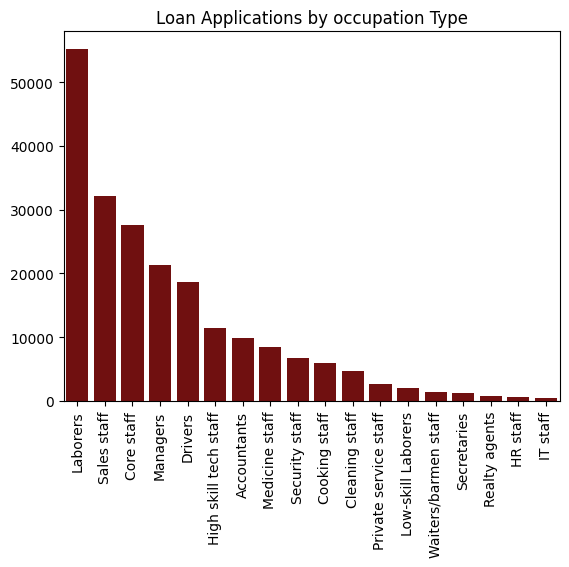

In [216]:
# Distribution of 'OCCUPATION_TYPE'

temp = credit_data2['OCCUPATION_TYPE'].value_counts()                      # Value counts for Occupation type
sns.barplot(x = temp.index, y = temp.values, color = 'maroon')             # Plotting bar graph
_=plt.xticks(rotation = 90)                                                # Rotating x axis ticks so that values dont overlap
_=plt.title('Loan Applications by occupation Type')                        # Chart title


We can infer that most of the applications come for Labourers, Sales Staff and Core Staff. 

##### Organization Type

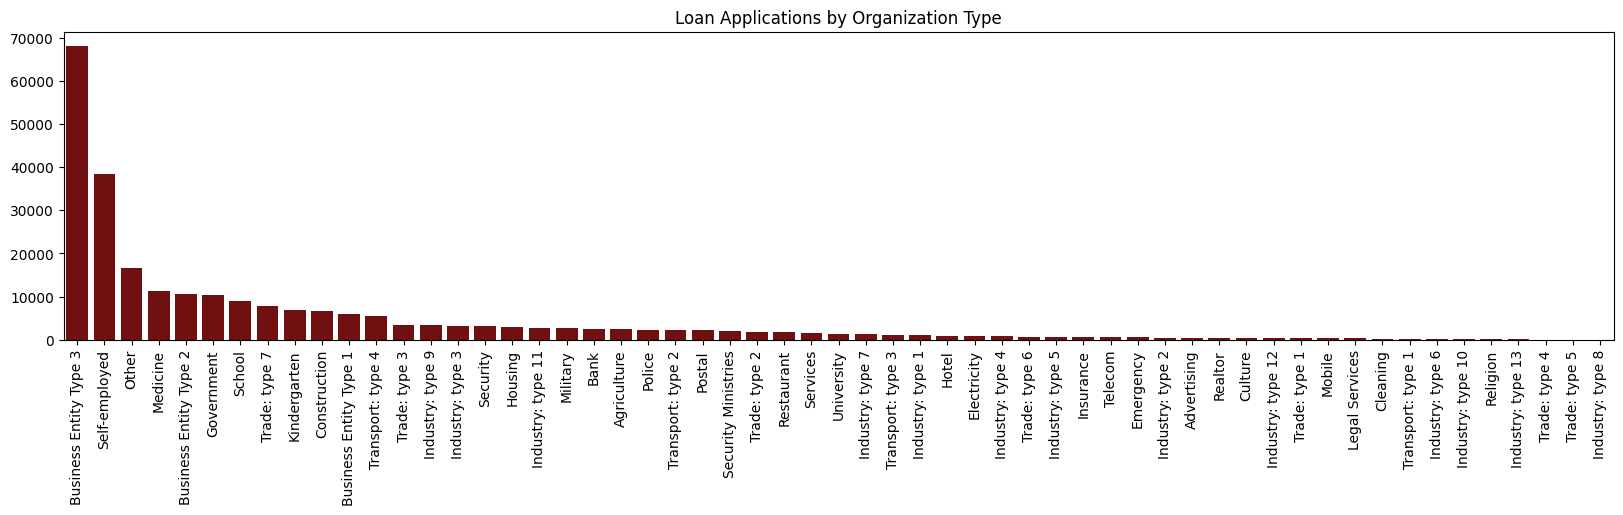

In [88]:
# Distribution of 'Organization Type'
plt.figure(figsize=(20,4))
temp = credit_data2['ORGANIZATION_TYPE'].value_counts()
sns.barplot(x = temp.index, y = temp.values, color = "maroon")
_=plt.xticks(rotation = 90)
_=plt.title('Loan Applications by Organization Type')

It is observed that majority of the applicants belong to Business Entity Type 3 an Self Employed. 

##### Comparison of Gender Distribution among Total Applicants and Defaulters

In [101]:
credit_data2['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

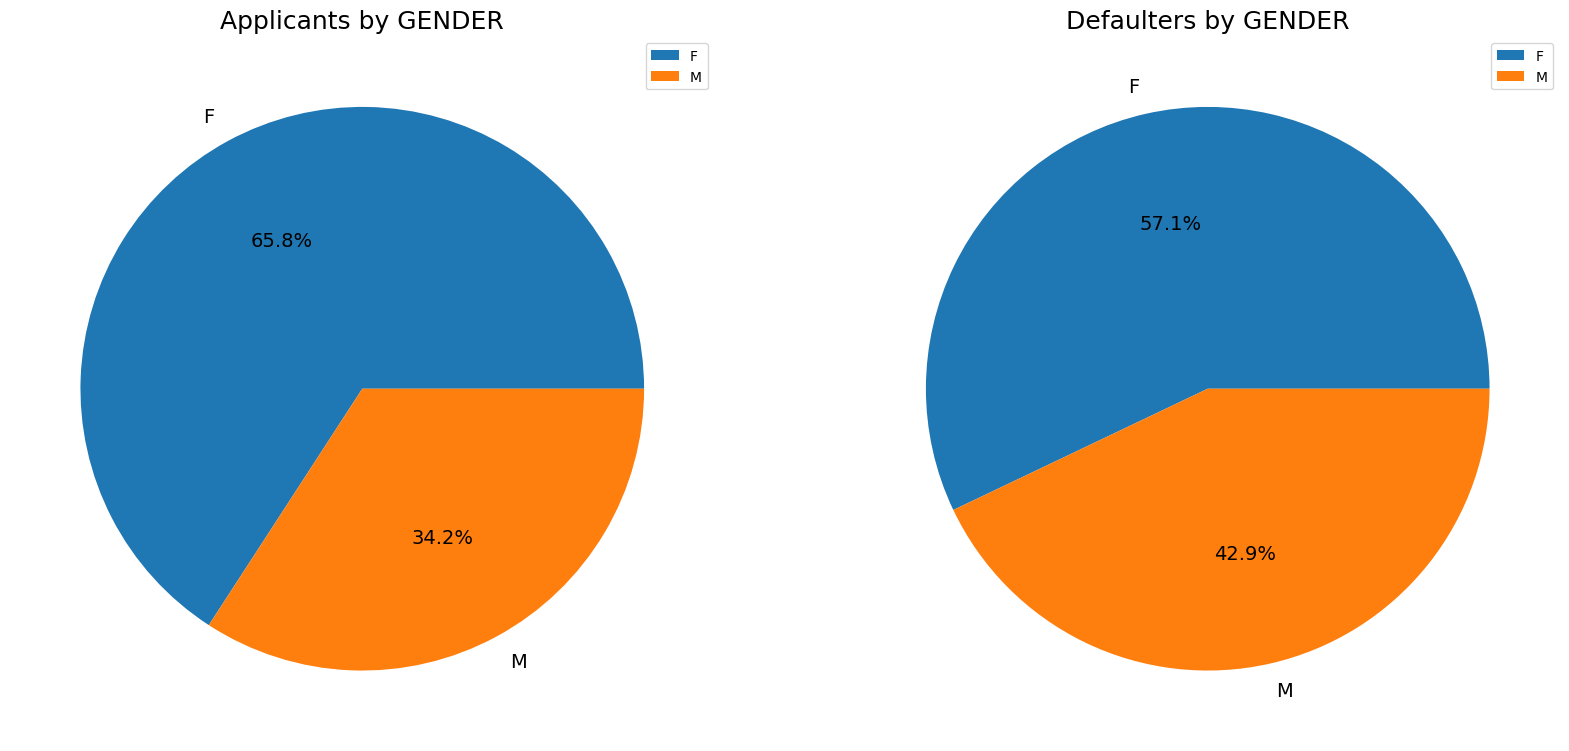

In [127]:
## Code to See the Comparison of Gender Applicants Distribution among Defaulters and Non-Defaulters 

colors = sns.color_palette('tab10')[0:5]                             # Setting Color pallette for pie chart

fig,axes = plt.subplots(nrows = 1, ncols=2,figsize = (20,12))        # Defining Subplots and figure size. Keeping it wider for 2 chart
data = credit_data2['CODE_GENDER'].value_counts()                   # Data prep fot Subplot 1 ( Non Defaulter )
data_df = pd.DataFrame({'labels':data.index, 'values':data.values})

# Pie chart for Subplot 1 ( Total applicants part )
_=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors,autopct='%0.1f%%',textprops={'fontsize': 14})
_=axes[0].legend()
_=axes[0].set_title('Applicants by GENDER', size=18)

# Pie chart for Subplot 1 ( defaulters part )
data = defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels':data.index,'values':data.values})
_=axes[1].pie(data_df['values'],labels = data_df['labels'], autopct='%0.1f%%',textprops={"fontsize": 14})
_=axes[1].legend()
_=axes[1].set_title('Defaulters by GENDER', size = 18)


Insights - 

* There is majority of Female loan apllicants
* More Men deafult loans as compared to Women, since the % split has increased further for Men in case of Defaulter distribution.

Often we would require to re-use the same code for multiple combination of variables.

It is a common practice to prepare charts by calling functions instead of re-writing the code again and again.

There are following benefits to this appraoch - 
* Code Modularity is improved
* Less code is required to perform same amount of task
* Notebook looks more cleaner


In [138]:
def univariate_comparision(col):
    colors = sns.color_palette('tab10')[0:5]                             
    fig,axes = plt.subplots(nrows = 1, ncols=2,figsize = (20,12))        
    data = credit_data2[col].value_counts()
    data_df = pd.DataFrame({'labels':data.index, 'values':data.values})
    _=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors,autopct='%0.1f%%',textprops={'fontsize': 14})
    _=axes[0].legend()
    _=axes[0].set_title('Applicants by ' +col, size=18)
    data = defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels':data.index,'values':data.values})
    _=axes[1].pie(data_df['values'],labels = data_df['labels'], autopct='%0.1f%%',textprops={"fontsize": 14})
    _=axes[1].legend()
    _=axes[1].set_title('Defaulters by ' + col, size = 18)


##### Comparison of Income Type Distribution among Total Applicants and Defaulters

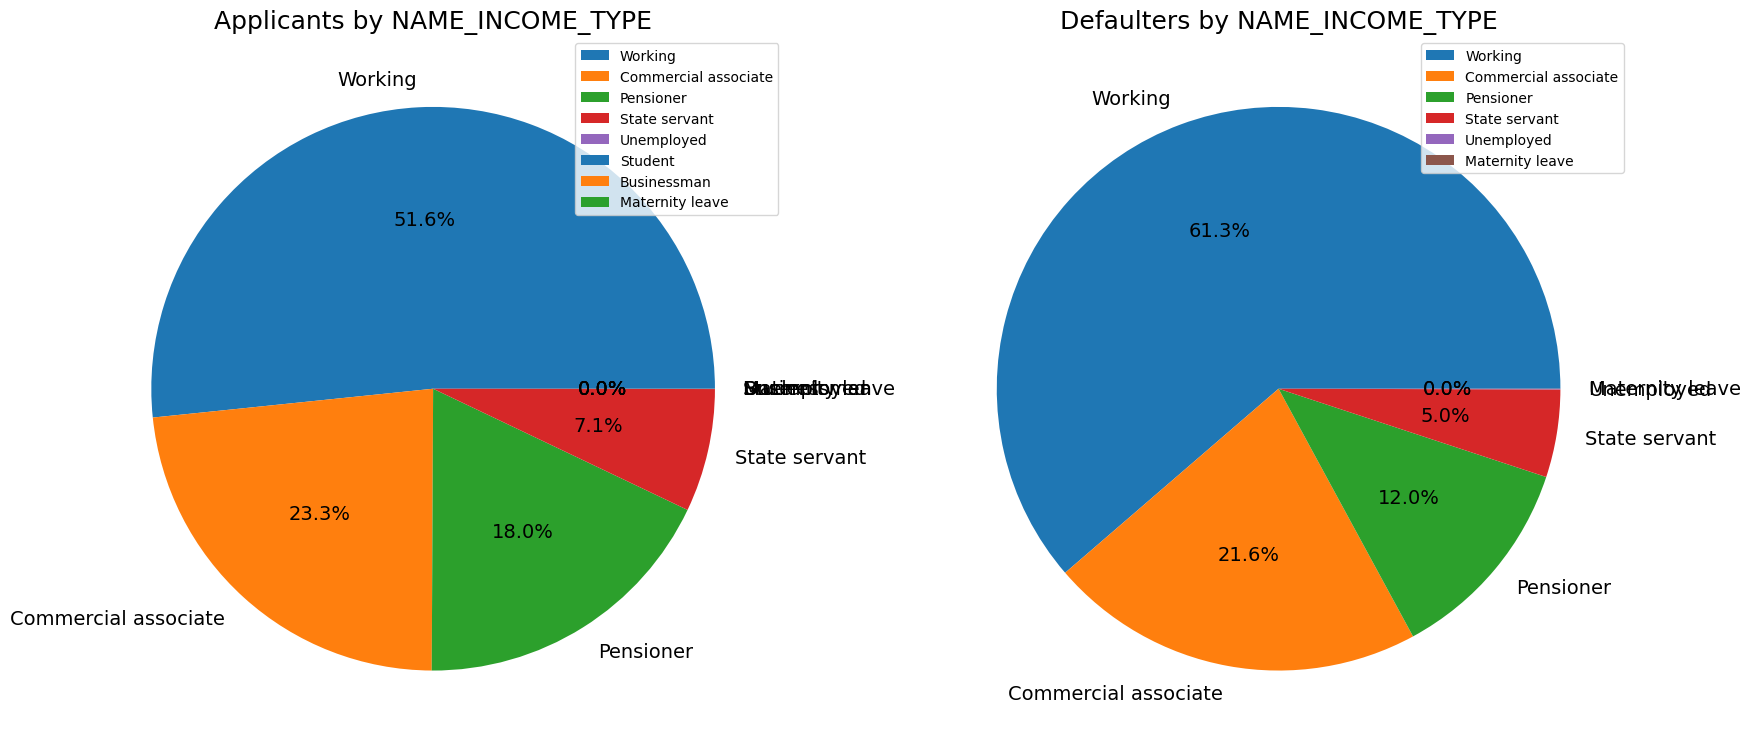

In [139]:
univariate_comparision('NAME_INCOME_TYPE')

Insights - 
* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

##### Comparison of Family Status Distribution among Total Applicants and Defaulters

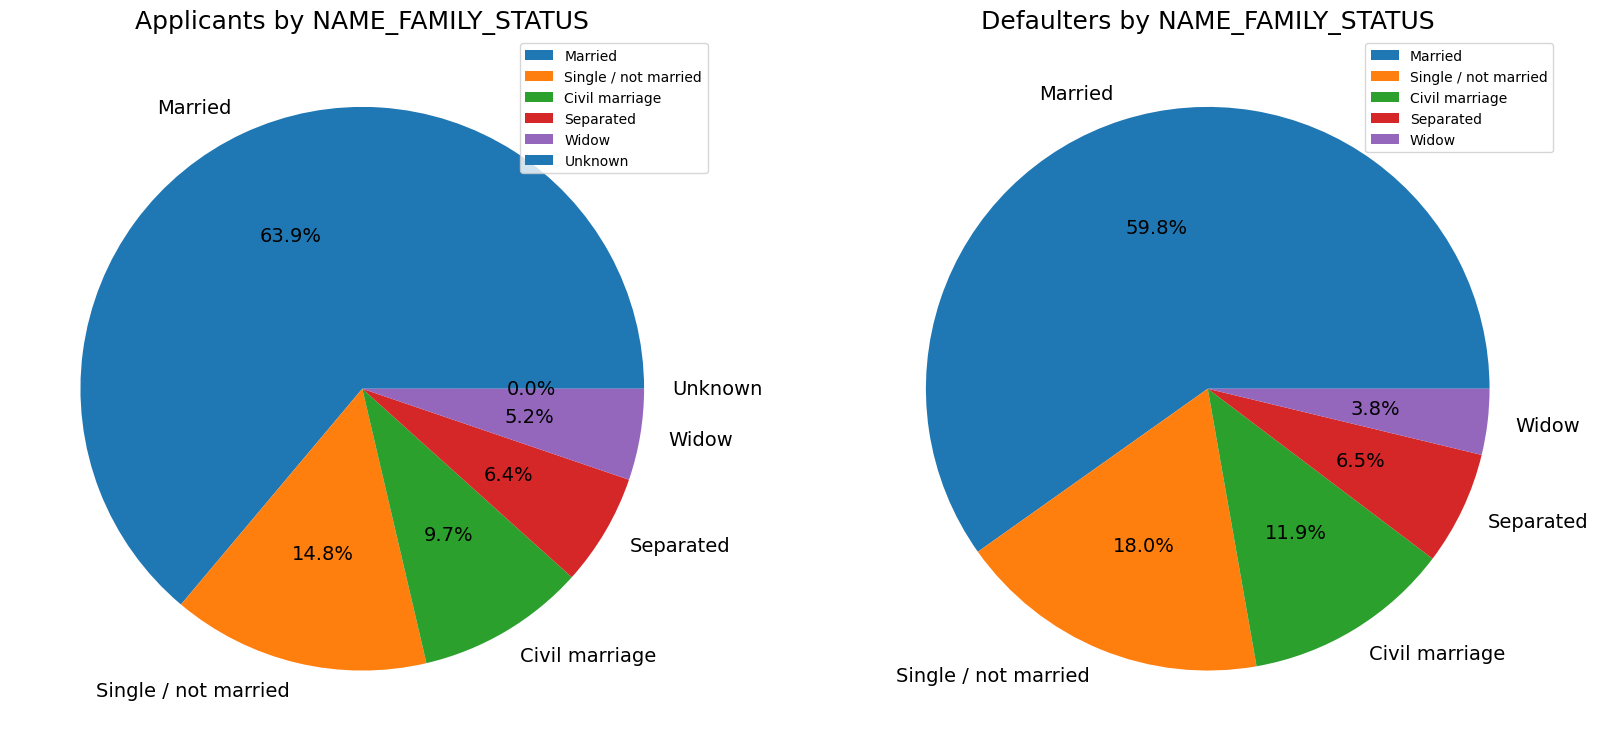

In [141]:
univariate_comparision('NAME_FAMILY_STATUS')

Insights-
* 65 % of the Loan applicants are married.
* Family status doesn't seem to have any major impact on Loan deafults.However, single/not married default % has increased little(approx. 4%) which shows they single/not married people are more likely to default than married people

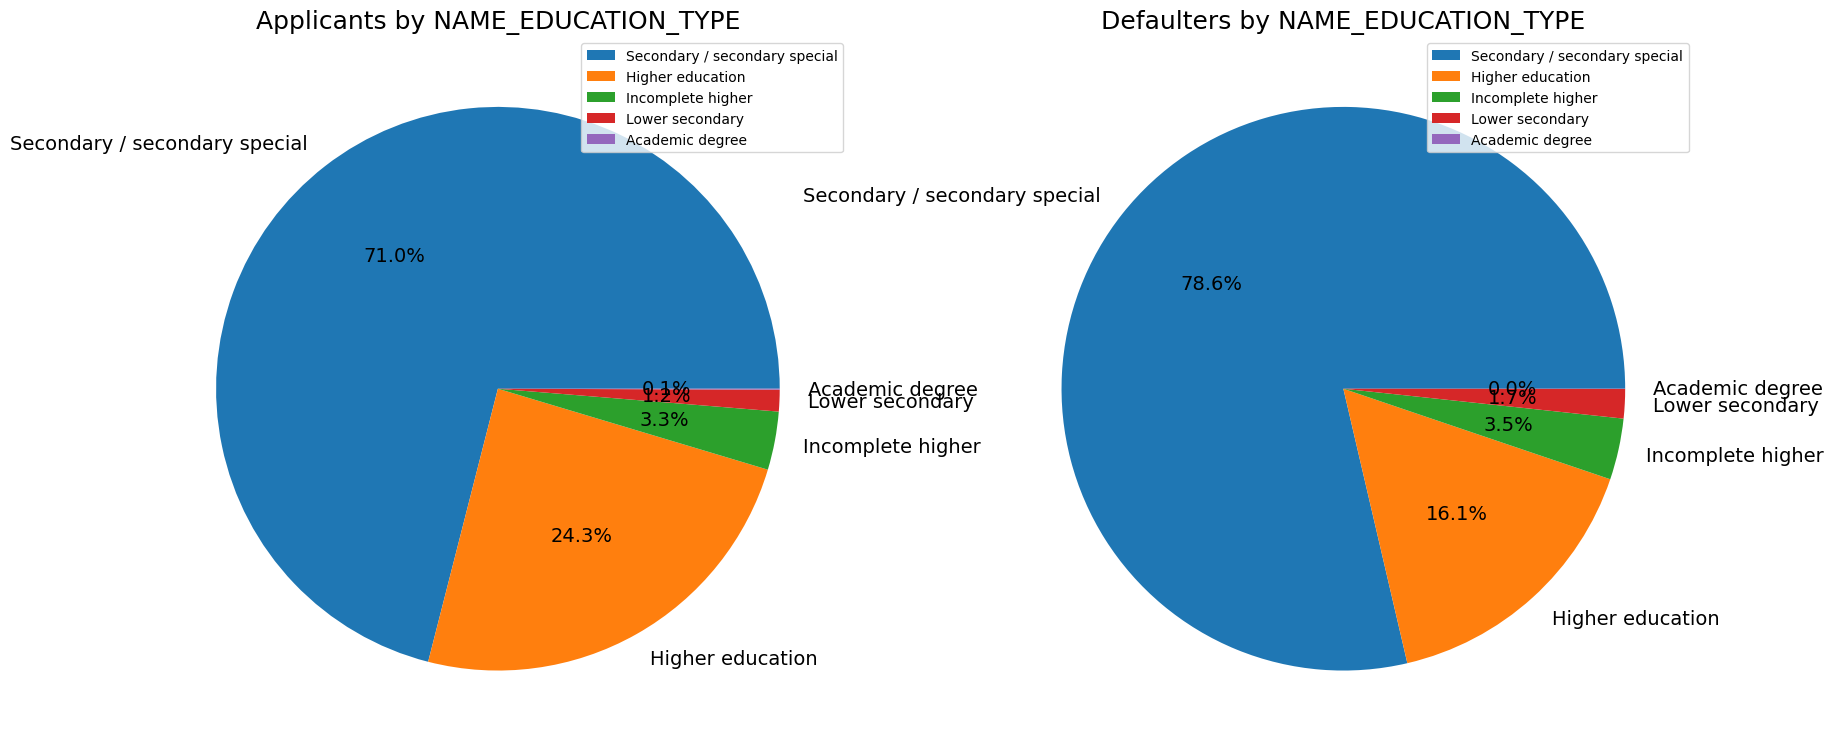

In [143]:
# Comparison of Education Type Distribution among Total applicants and Defaulters

univariate_comparision('NAME_EDUCATION_TYPE')

Insights-
* More than 2/3rds of Loan applicants have highest education as Secondary. 
* Secondary Education class contribute majorly ( more than expected too) for loan defaults.
* There is a considerable decrease in % split for loan defaults by people with higher education. ( from 25% to 16%)

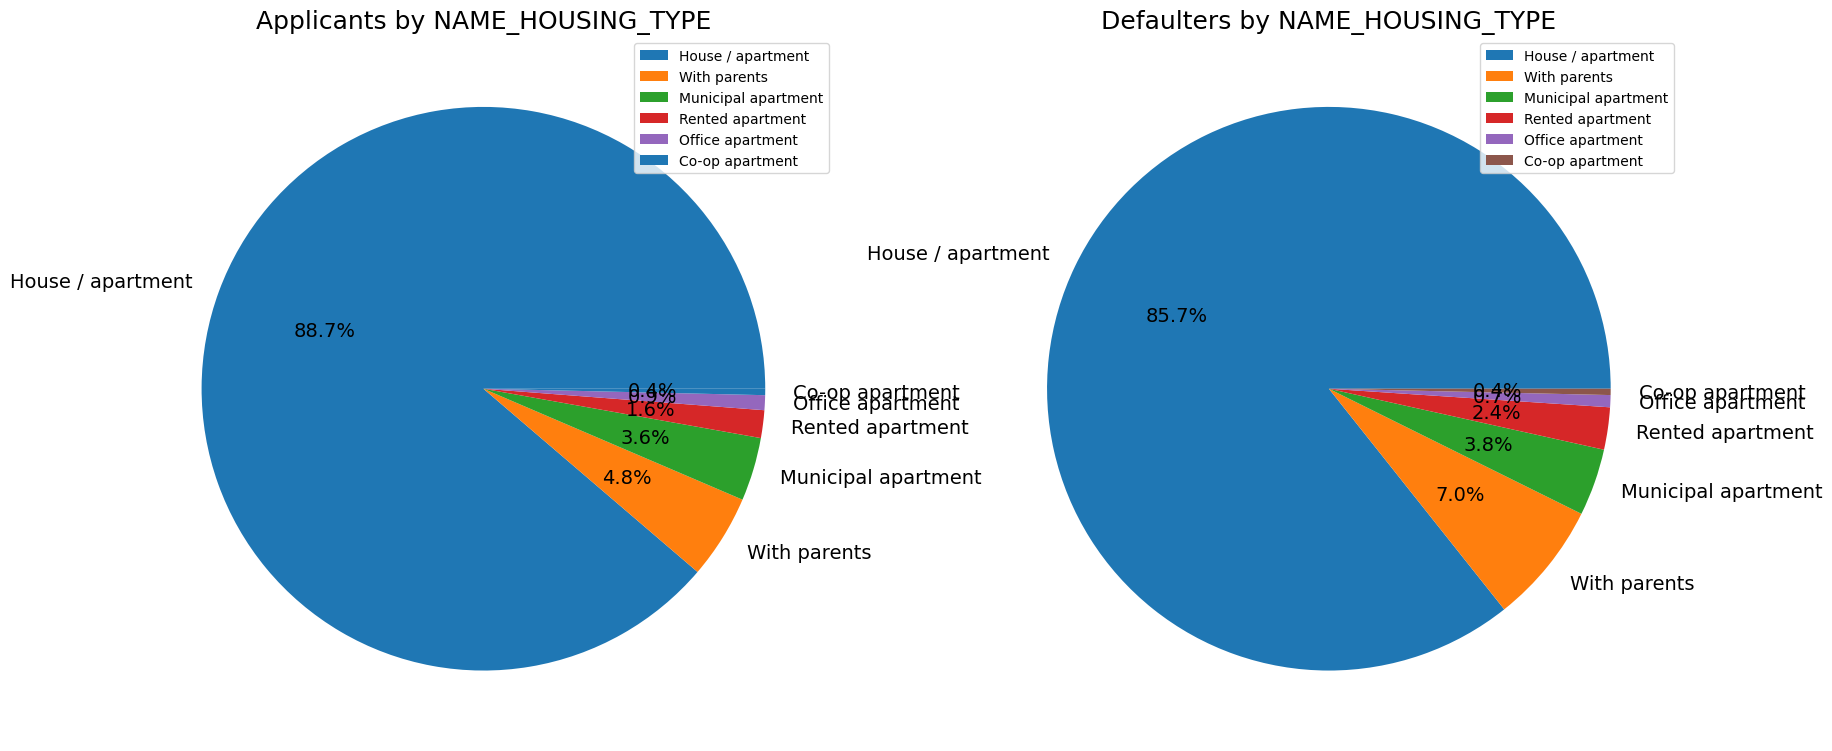

In [144]:
# Comparison of Housig Type Distribution among Total applicants and Defaulters


univariate_comparision('NAME_HOUSING_TYPE')

Insights-
* Almost 90% of Loan applicants have their own home.
* Housing type doesn't play a significant role in determining whether there will be a loan defaulter. 

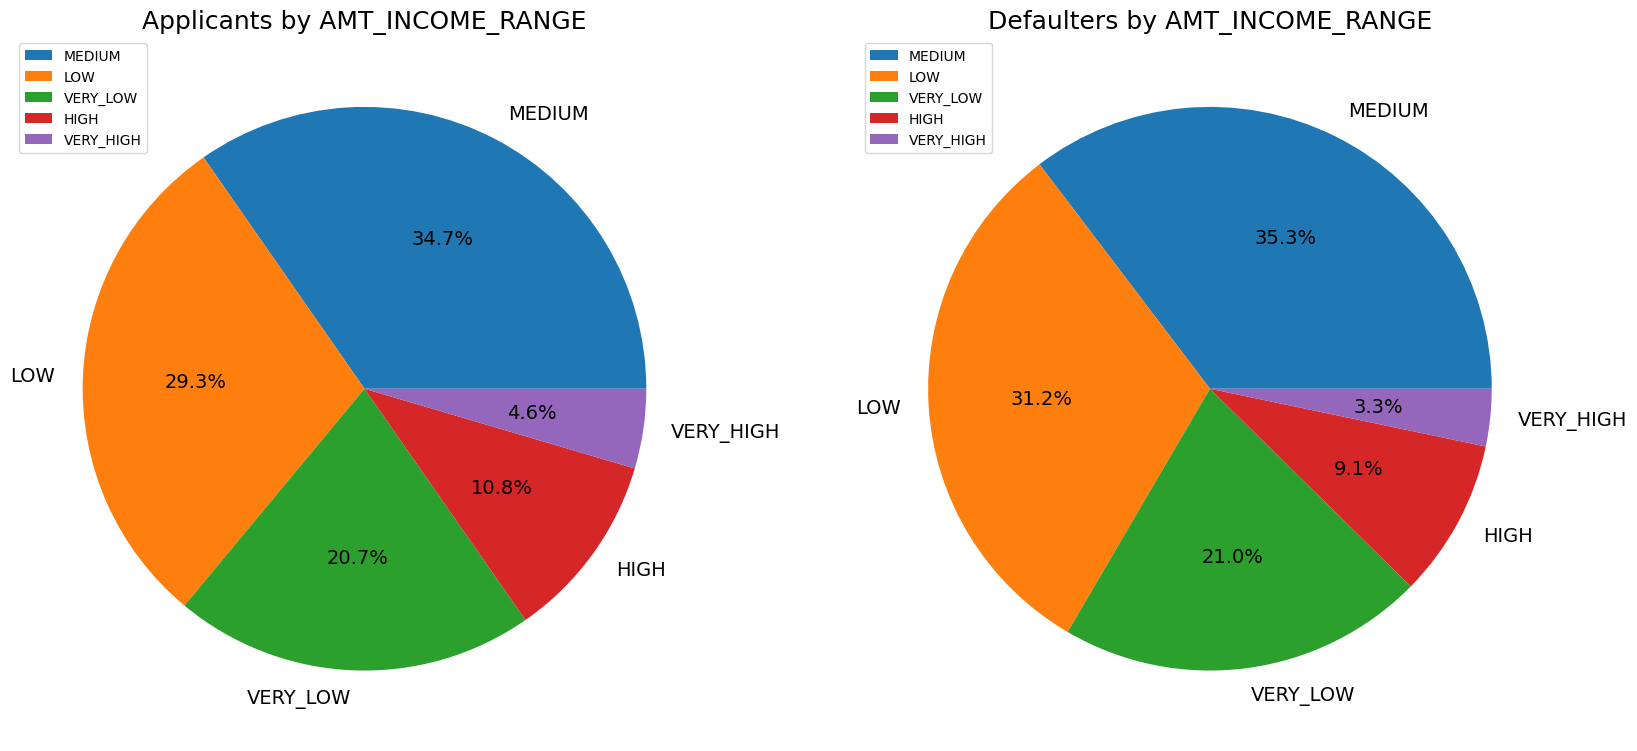

In [145]:
# Comparison of Income Range Distribution among Total applicants and Defaulters

univariate_comparision('AMT_INCOME_RANGE')

Insights-
* Here also, the % split is more or less unchanged for Defaulters. It suggests that Income doesn't play a significant role in loan defaults. Although, further drilldown analysis ( later done in this notebook ) would tell us a different story.

It is always good practice to verify our hypotheses by multiple checks and not jump onto conclusions quickly. 

NOTE : Let's recall that AMT_INCOME_RANGE is a derived variable created by binning earlier. 
This how binning can be useful in EDA, while this is just one use case, it has many other applications in ML as well. 

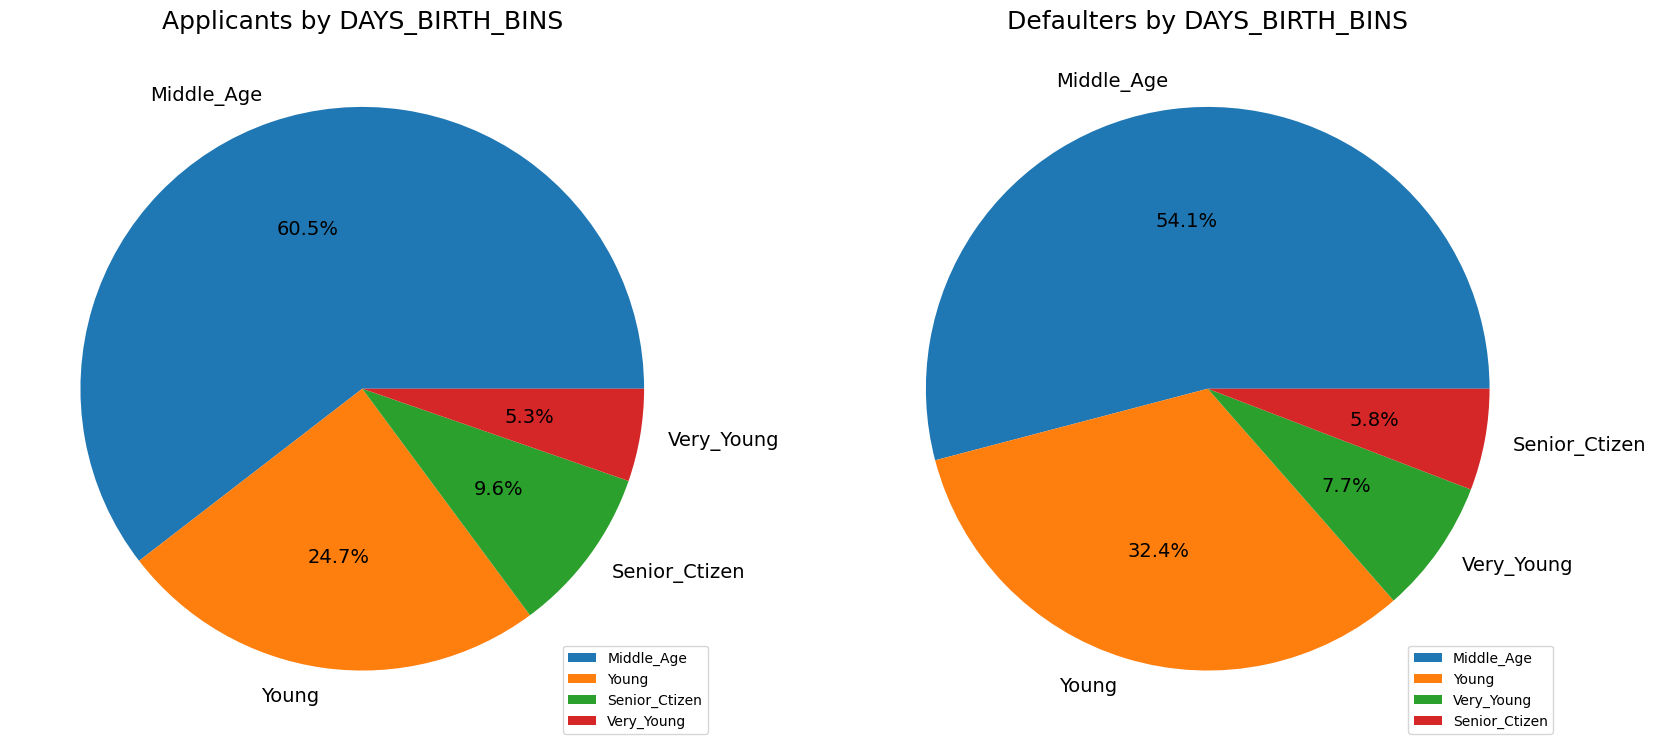

In [217]:
# Comparison of Age Distribution among Total applicants and Defaulters

univariate_comparision('DAYS_BIRTH_BINS')

Insights - 
* There is a significant shift in % split for Middle Age and Young applicants.
* Middle Aged applicants are contributing lesser to loan defaults
* Young applicants are more expected to default on a loan since there is a change in % aplit from 24% to 32%

##### Comparison of Loan Type Distribution among Total applicants and Defaulters


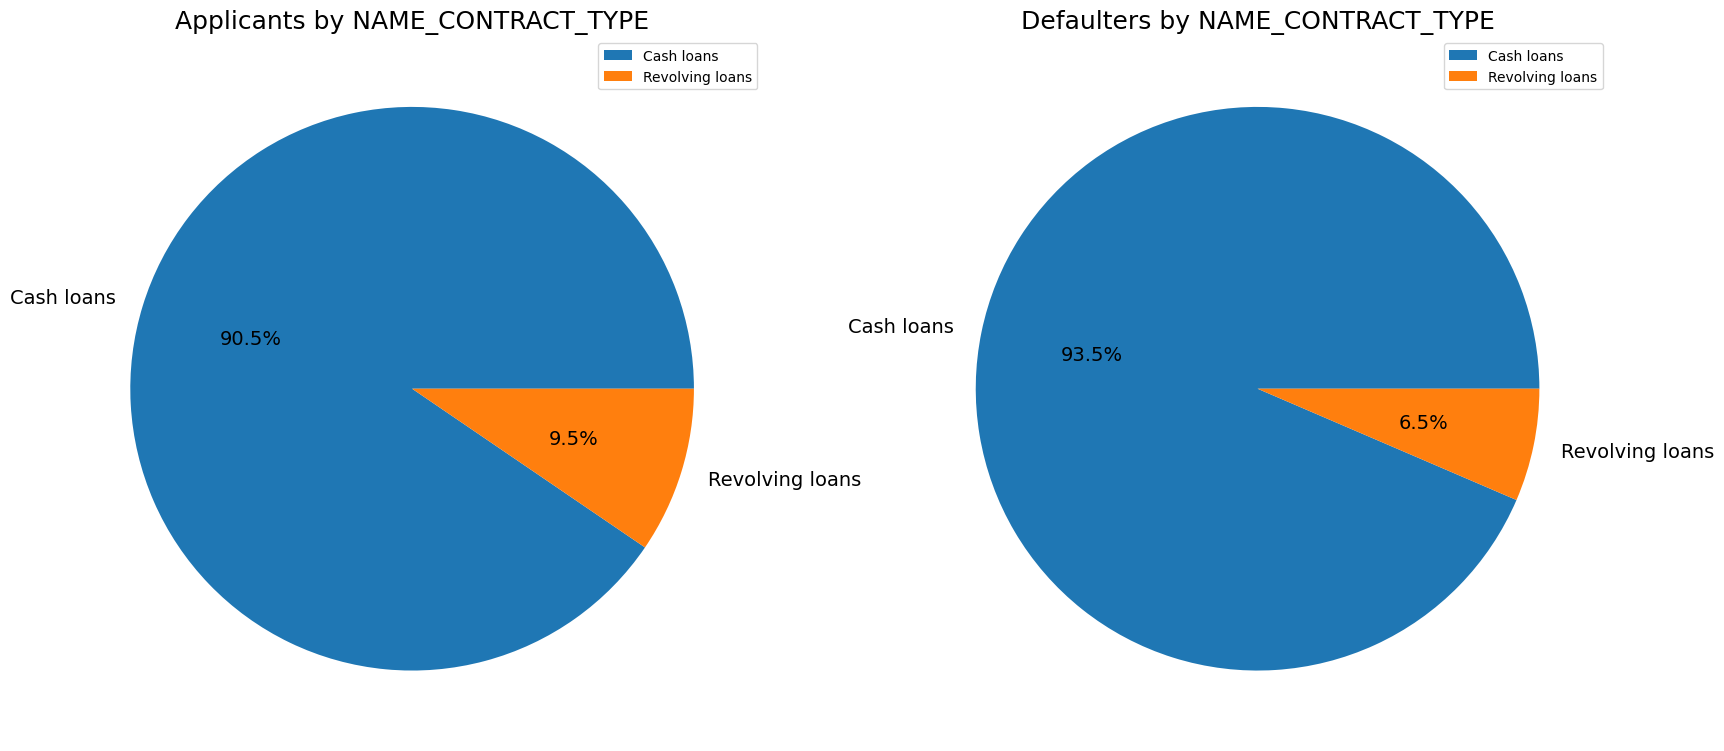

In [149]:
univariate_comparision('NAME_CONTRACT_TYPE')

Insights-
* Cash loans are slightly more likely to be defaulted than revolving loans. 

##### Comparison of Accompany Type Distribution among Total applicants and Defaulters

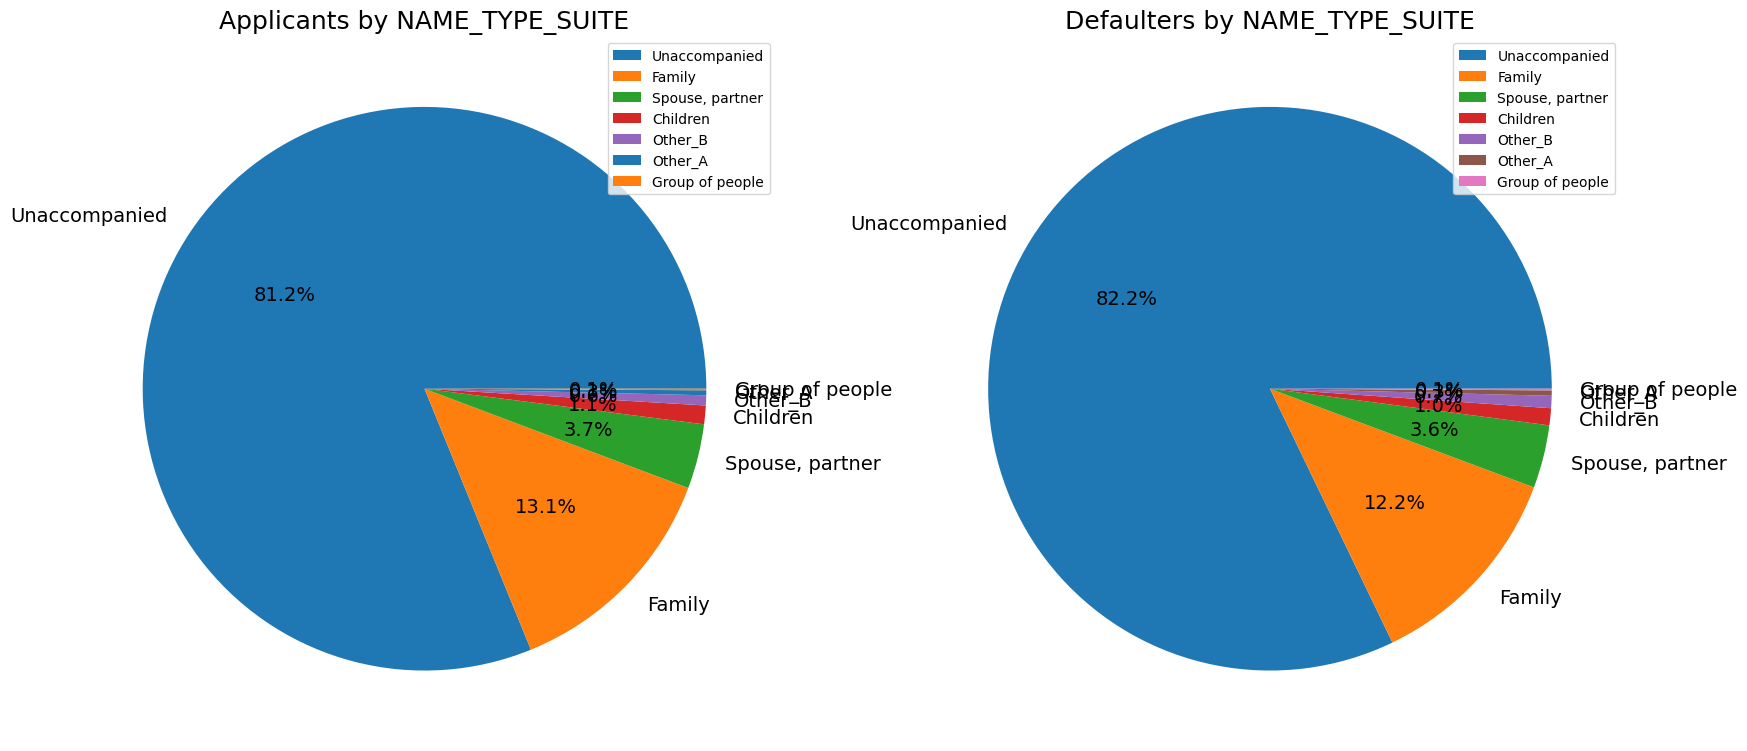

In [150]:
# Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

univariate_comparision('NAME_TYPE_SUITE')

 Insights-
* Majority of loans are applied by single occupants
* This parameter doesn't have any impact on loan defaults as the % split is unchanged in both cases.

## 3. Bivariate & Multivariate Analysis

Bivariate Analysis - 

It is one of the simplest form of statistical analysis where 2 variables are involved. It looks for relationship among the 2 variables.
The applications involve hypothesis validation of association among variables, finding trends, regression etc.

Multivariate Analysis-

When more than 2 variable are involved in an analysis, it will be a multi-variate analysis. The additional variables may take form of hue color, 3rd axis etc. 

In [200]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')


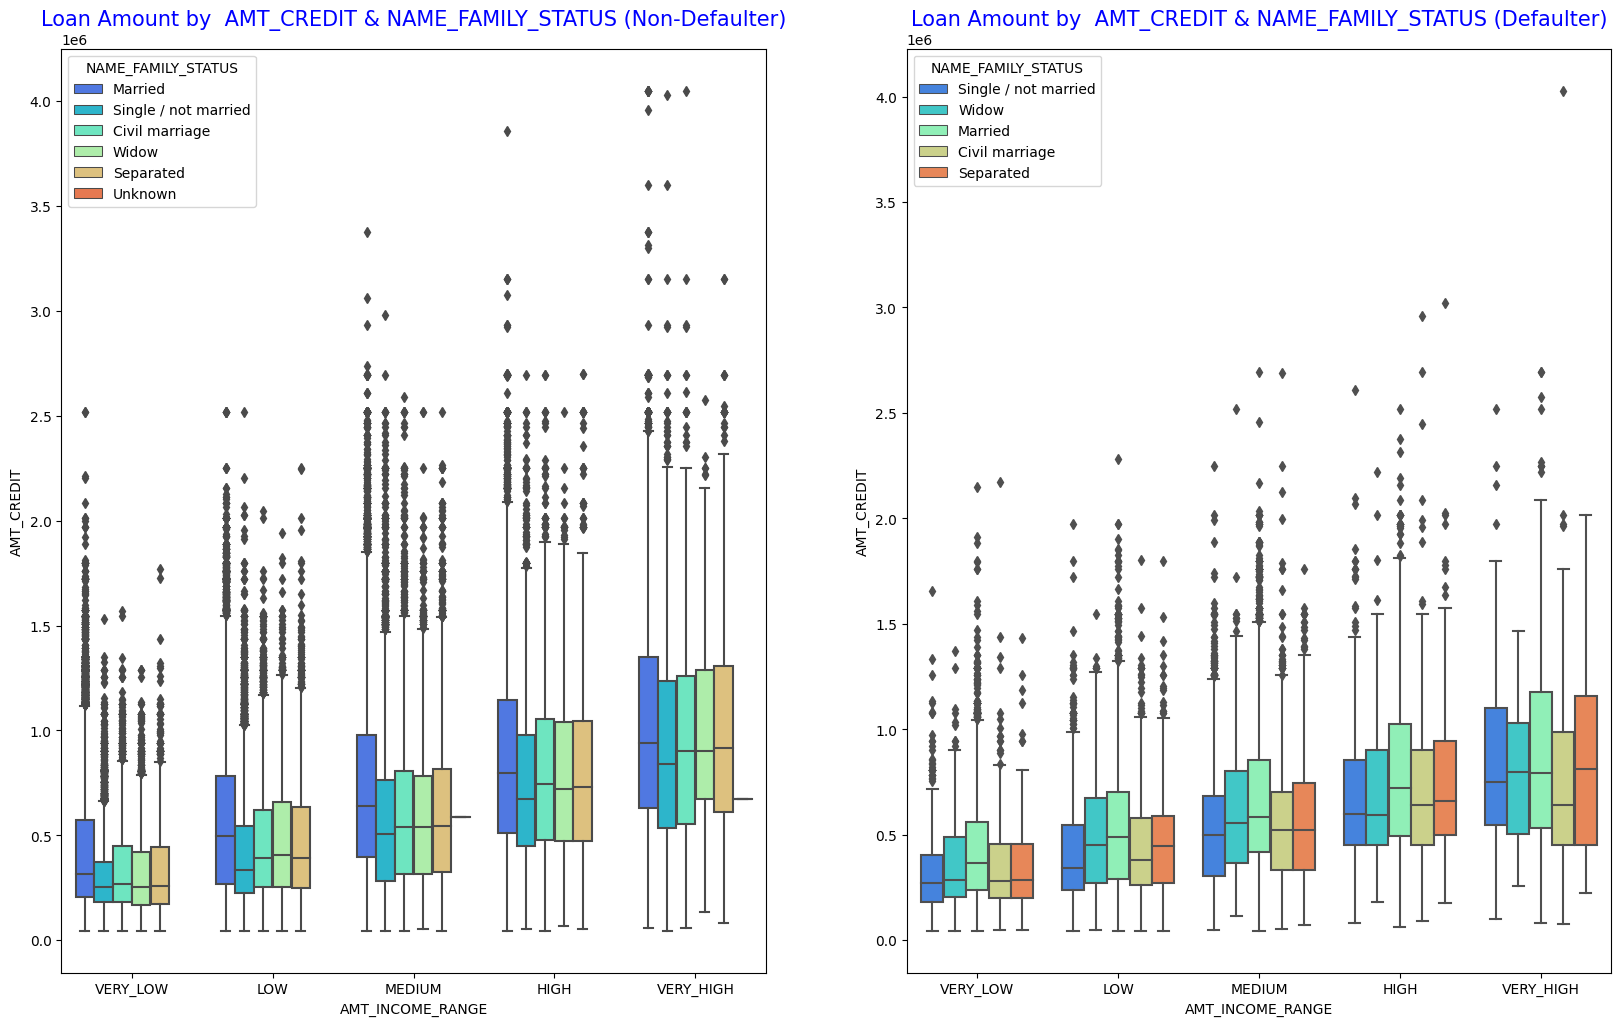

In [218]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.


#### Drilldown Analysis

Here we'll look for % defaulters within different classes in a particular variable. 

In [204]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    total = credit_data2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total
    
    axes[0].set_title("Application Counts by  "+ col  )
    _=sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    _=sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')


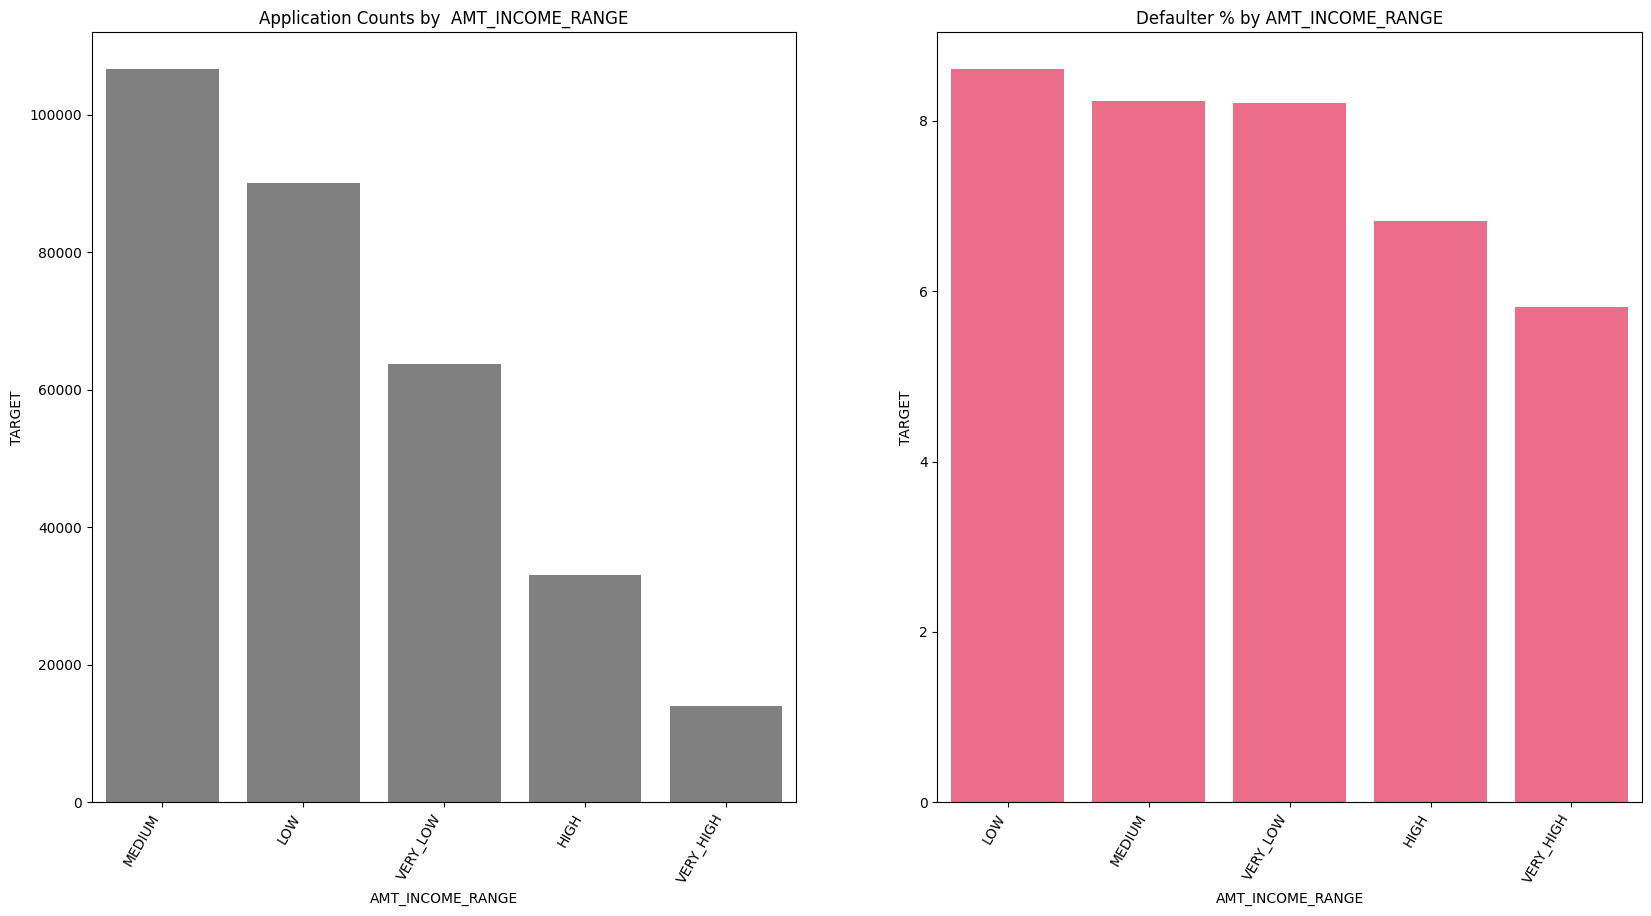

In [205]:
# Drilldown analysis of AMT_INCOME_RANGE

perc_defaulters('AMT_INCOME_RANGE')

Insights-
* Median income range professionals have maximum applications in the data
* Low Income range have maximum % of loan defaults
* As the Income range increases, loan default probability decreases

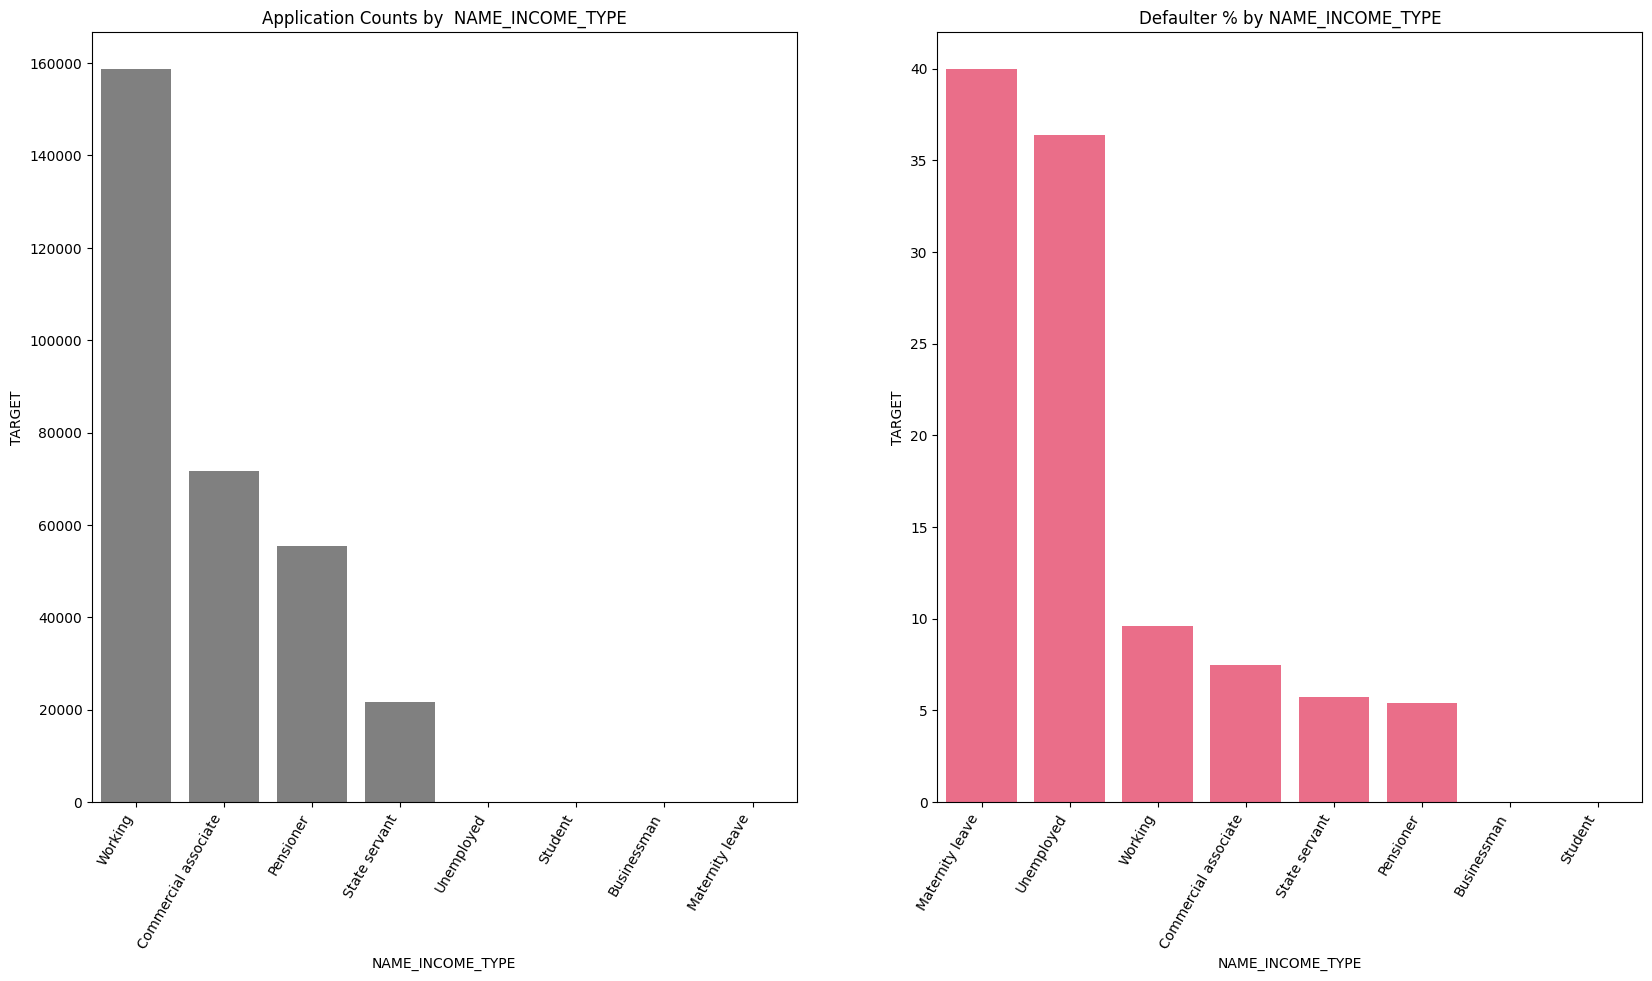

In [206]:
# Drilldown analysis of NAME_INCOME_TYPE

perc_defaulters('NAME_INCOME_TYPE')

Insights-
* Applicants on Maternity leave have a whopping 40% loan default rate
* The second to the list are Unemployed applicants with 35% loan defaults

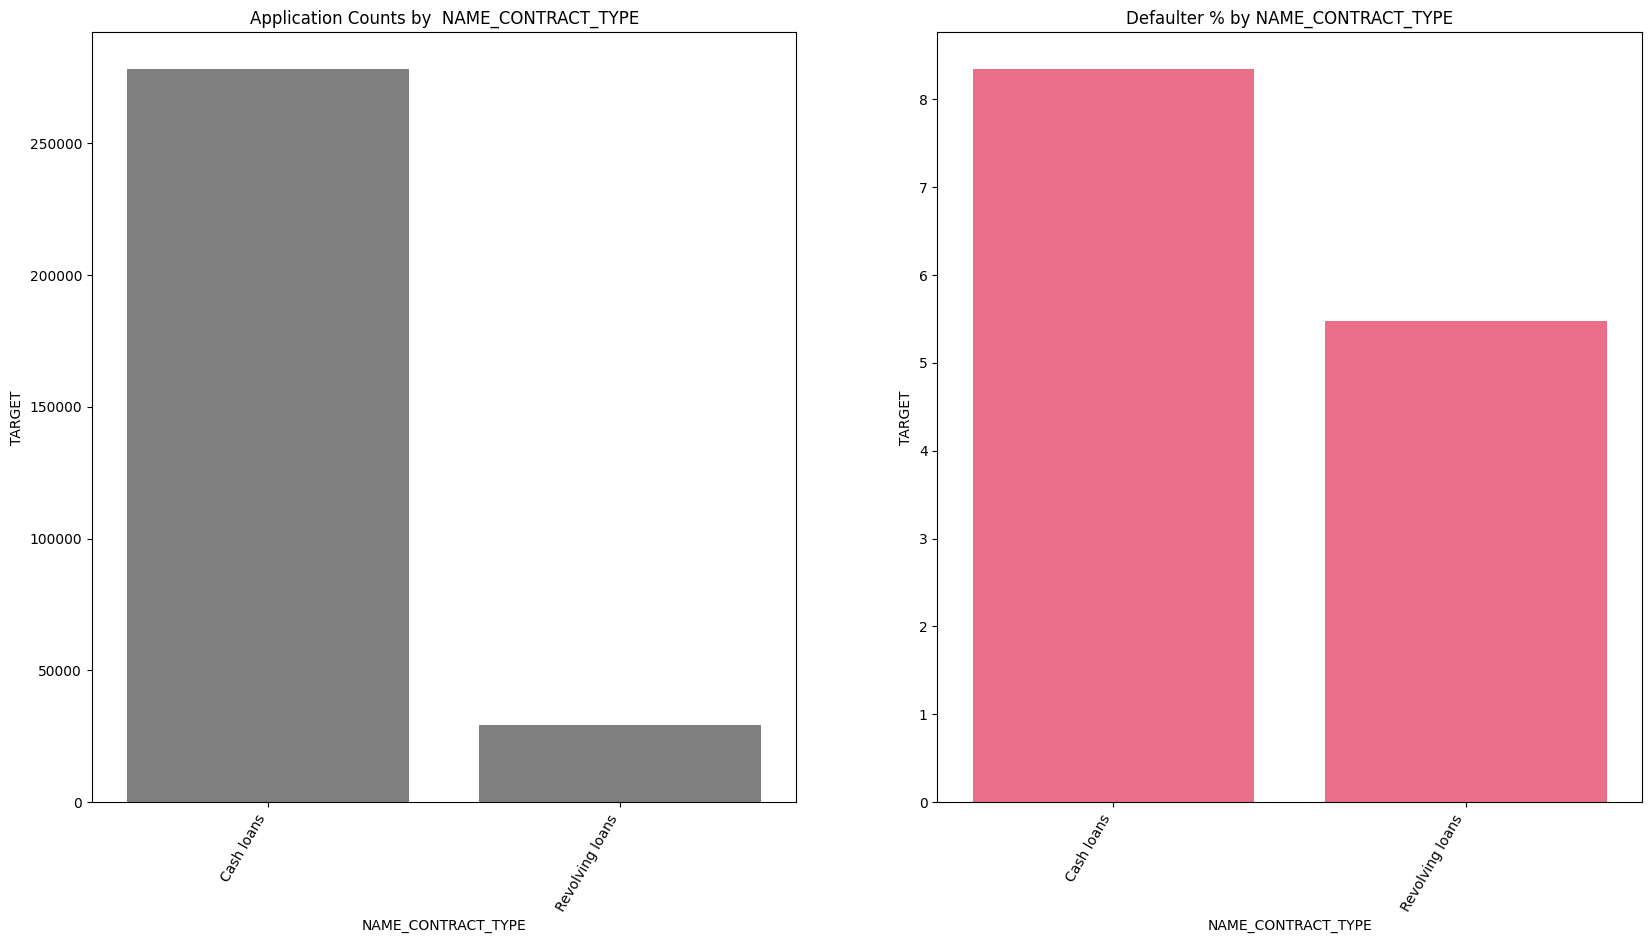

In [207]:
# Drilldown analysis of NAME_CONTRACT_TYPE
perc_defaulters('NAME_CONTRACT_TYPE')

Insights-
* Majority of the loans are cash loans. Cash loans also have almost double probability of a loan default than revolving loans.

In [ ]:
# Drilldown analysis of NAME_EDUCATION_TYPE
perc_defaulters('NAME_EDUCATION_TYPE')

Insights-
* Higher the education of an applicant, lesser the chance of loan default
* Lower secondary applicants have a concerning 11% loan default rate, but the count of applicants is low 
* The major concern is of Secondary education applicants. They have highest applicants and a significant 9% loan default rate as well. 

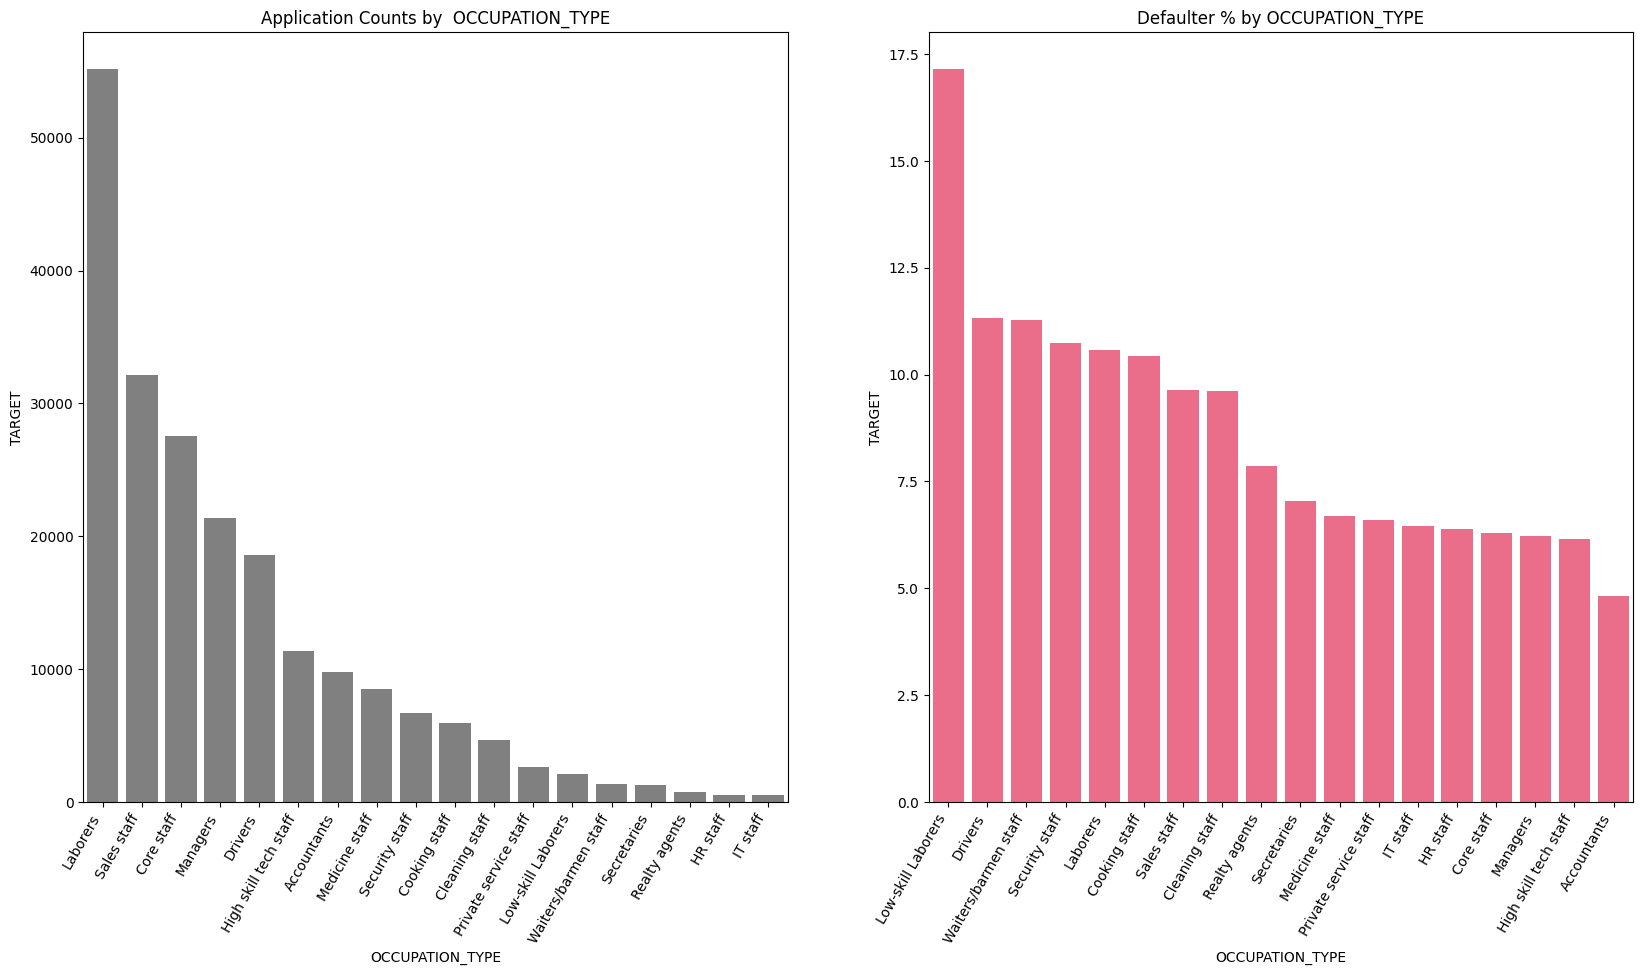

In [209]:
# Drilldown analysis of OCCUPATION_TYPE

perc_defaulters('OCCUPATION_TYPE')

Insights-
* Low skill labourers  have an alarming 17% loan default rate. The positive here is that they don't have a high applicant count.
* Labourers  & Sales staff will be a major area of concern here, with maximum applicants and a significant loan default rate as well. 
* Drivers also have an alarming combination of counts and default %.

##### Pivot table of all loan default %

In [219]:
perc_defaulters= pd.pivot_table(credit_data2, values='TARGET', 
                      index=['CODE_GENDER','AMT_INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          5.606793   
            LOW                      0.000000          4.902183   
            MEDIUM                   0.000000          5.025389   
            HIGH                    10.526316          4.151552   
            VERY_HIGH                7.692308          3.728906   
M           VERY_LOW                 0.000000          8.041061   
            LOW                      0.000000          7.330468   
            MEDIUM                   0.000000          7.008598   
            HIGH                     0.000000          5.591114   
            VERY_HIGH                0.000000          4.407996   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   8.639863         8.019324   
            LOW                        8.007537        11.388889   
            MEDIUM                     7.843137         9.698276   
            HIGH                       7.431341         3.896104   
            VERY_HIGH                  8.225108         6.666667   
M           VERY_LOW                  12.396694        12.500000   
            LOW                        9.777778        14.285714   
            MEDIUM                     9.513024        15.051546   
            HIGH                       7.462687         8.163265   
            VERY_HIGH                  7.758621         6.451613   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               7.677801  
            LOW                                    7.952316  
            MEDIUM                                 7.569169  
            HIGH                                   7.073552  
            VERY_HIGH                              6.593002  
M           VERY_LOW                              11.806626  
            LOW                                   12.369265  
            MEDIUM                                11.346642  
            HIGH                                   9.348442  
            VERY_HIGH                              8.993853

Insights - 

Categories with more than 9% default rate - 
* Females, High Income, Academic degree
* Male, Very Low income , Incomplete higher
* Male, Low Income , Incomplete higher
* Male, Medium Income , Incomplete higher
* Female, Low Income, Lower Secondary
* Female, Medium Income, Lower Secondary
* Male, Very Low Income, Lower Secondary
* Male, Low Income, Lower Secondary
* Male, Medium Income, Lower Secondary
* Male, {ALL INCOME RANGES} , Secondary


##### Bivariate Analysis using Pairplot 

In [220]:
# Data for Pairplot

pairplot_data = credit_data2[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)

In [ ]:
# Plotting pairplot
_=sns.pairplot(pairplor_data,hue='TARGET',diag_kind='kde')

Insights-

* AMT_CREDIT & AMT_GOODS_PRICE are correlated  ( With higher priced goods, loan amount is higher)
* AMT_ANNUITY & AMT_GOODS_PRICE are also correlated ( With higher annuity, expensive goods are purchased)
* AMT_ANNUITY & AMT_CREDIT are correlated (Higher the annuity,higher the loan amount)

With respect to TARGET - 
* Loan defaulters ( Blue ) are younger in age


##### Correlation Check using Heatmap

In [ ]:
# Data prep for heatmap
heatmap_data = credit_data2[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')

In [ ]:
# Plotting heatmap
_=sns.heatmap(heatmap_data, cmap='YlGnBu')

Insights-
* The heatmap confirms our correlation findings from pariplot

##### Top 10 correlations in the data

In [ ]:
# Preparing data for getting top 10 correlation combinations 

corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

# Filtering top half traingle usng np.triu
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

corr_matrix_df=corr_matrix.unstack().reset_index()            # Unstacking the last dataframe to get combos of 2 variables 
corr_matrix_df

In [ ]:
corr_matrix_df.columns = ['Variable 1','Variable 2','Correlation']          # Naming the cols apprpriately
corr_matrix_df.dropna(subset=['Correlation'],inplace=True)                  # Dropping NAs

# Adding absolute column as we are interested in magnitude
corr_matrix_df['Correlation ( Absolute )']=corr_matrix_df['Correlation'].abs() 

# Sorting by top correlations and getting top 10 combos
corr_matrix_df.sort_values('Correlation ( Absolute )', ascending=False).head(10)

# 4. Final Insights 

Following are the driving factors for a loan default - 

* Lower the highest education of an applicant, higher the chance of loan default. 
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men deafault loans as compared to Women
